<a href="https://colab.research.google.com/github/VijayarahavanRS/INSE-6220/blob/main/Copy_of_SampleProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [ ]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [87]:
#read cvs file into dataframe
df = pd.read_csv('/content/Sheet 1-bodyfat.csv')
df.head(n=15)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0    1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1    1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2    1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3    1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4    1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5    1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6    1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7    1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8    1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9    1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   
10   1.0830      7.1   26  186.25   74.50  38.5  101.5     83.6   98.2   59.7   
11   1.0812      7.8   27  216.00   76.00  39.4  103.6     90.9  107.7   66.2   
12   1.0513     20.8   32  180.50   69.50  38.4  102.0     91.6  103.9   63.4   
13   1.0505     21.2   30  205.25   71.25  39.4  104.1    101.8  108.6   66.0   
14   1.0484     22.1   35  187.75   69.50  40.5  101.3     96.4  100.1   69.0   

    Knee  Ankle  Biceps  Forearm  Wrist  FatLevel  
0   37.3   21.9    32.0     27.4   17.1         0  
1   37.3   23.4    30.5     28.9   18.2         0  
2   38.9   24.0    28.8     25.2   16.6         1  
3   37.3   22.8    32.4     29.4   18.2         0  
4   42.2   24.0    32.2     27.7   17.7         1  
5   42.0   25.6    35.7     30.6   18.8         1  
6   38.3   22.9    31.9     27.8   17.7         0  
7   39.4   23.2    30.5     29.0   18.8         0  
8   38.3   23.8    35.9     31.1   18.2         0  
9   41.7   25.0    35.6     30.0   19.2         0  
10  39.7   25.2    32.8     29.4   18.5         0  
11  39.2   25.9    37.2     30.2   19.0         0  
12  38.3   21.5    32.5     28.6   17.7         1  
13  41.5   23.7    36.9     31.6   18.8         1  
14  39.0   23.1    36.1     30.5   18.2         1

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Density   252 non-null    float64
 1   BodyFat   252 non-null    float64
 2   Age       252 non-null    int64  
 3   Weight    252 non-null    float64
 4   Height    252 non-null    float64
 5   Neck      252 non-null    float64
 6   Chest     252 non-null    float64
 7   Abdomen   252 non-null    float64
 8   Hip       252 non-null    float64
 9   Thigh     252 non-null    float64
 10  Knee      252 non-null    float64
 11  Ankle     252 non-null    float64
 12  Biceps    252 non-null    float64
 13  Forearm   252 non-null    float64
 14  Wrist     252 non-null    float64
 15  FatLevel  252 non-null    int64  
dtypes: float64(14), int64(2)
memory usage: 31.6 KB


### **Classes**

In [89]:
y = df['FatLevel']
target = df['FatLevel'].to_numpy()

### **Features**

Data Matrix

In [90]:
X = df.iloc[:,0:15]
X.head(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
5  42.0   25.6    35.7     30.6   18.8  
6  38.3   22.9    31.9     27.8   17.7  
7  39.4   23.2    30.5     29.0   18.8  
8  38.3   23.8    35.9     31.1   18.2  
9  41.7   25.0    35.6     30.0   19.2

In [64]:
X.describe().transpose()

count        mean        std      min       25%       50%       75%  \
Density  252.0    1.055574   0.019031    0.995    1.0414    1.0549    1.0704   
BodyFat  252.0   19.150794   8.368740    0.000   12.4750   19.2000   25.3000   
Age      252.0   44.884921  12.602040   22.000   35.7500   43.0000   54.0000   
Weight   252.0  178.924405  29.389160  118.500  159.0000  176.5000  197.0000   
Height   252.0   70.148810   3.662856   29.500   68.2500   70.0000   72.2500   
Neck     252.0   37.992063   2.430913   31.100   36.4000   38.0000   39.4250   
Chest    252.0  100.824206   8.430476   79.300   94.3500   99.6500  105.3750   
Abdomen  252.0   92.555952  10.783077   69.400   84.5750   90.9500   99.3250   
Hip      252.0   99.904762   7.164058   85.000   95.5000   99.3000  103.5250   
Thigh    252.0   59.405952   5.249952   47.200   56.0000   59.0000   62.3500   
Knee     252.0   38.590476   2.411805   33.000   36.9750   38.5000   39.9250   
Ankle    252.0   23.102381   1.694893   19.100   22.0000   22.8000   24.0000   
Biceps   252.0   32.273413   3.021274   24.800   30.2000   32.0500   34.3250   
Forearm  252.0   28.663889   2.020691   21.000   27.3000   28.7000   30.0000   
Wrist    252.0   18.229762   0.933585   15.800   17.6000   18.3000   18.8000   

              max  
Density    1.1089  
BodyFat   47.5000  
Age       81.0000  
Weight   363.1500  
Height    77.7500  
Neck      51.2000  
Chest    136.2000  
Abdomen  148.1000  
Hip      147.7000  
Thigh     87.3000  
Knee      49.1000  
Ankle     33.9000  
Biceps    45.0000  
Forearm   34.9000  
Wrist     21.4000

Notice that the data is not standardizd. So we need to standarize it.

In [65]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [66]:
df.describe().transpose()

count          mean      std        min       25%       50%  \
Density  252.0  5.688571e-15  1.00199  -3.189163 -0.746240 -0.035476   
BodyFat  252.0 -1.550788e-16  1.00199  -2.292926 -0.799293  0.005891   
Age      252.0  2.220446e-16  1.00199  -1.819583 -0.726319 -0.149870   
Weight   252.0  2.819614e-16  1.00199  -2.060102 -0.679300 -0.082657   
Height   252.0  1.480297e-15  1.00199 -11.119658 -0.519428 -0.040707   
Neck     252.0 -8.247371e-16  1.00199  -2.840817 -0.656227  0.003271   
Chest    252.0 -5.639228e-17  1.00199  -2.558224 -0.769481 -0.139558   
Abdomen  252.0  3.313046e-16  1.00199  -2.151708 -0.741610 -0.149229   
Hip      252.0  8.379540e-16  1.00199  -2.084632 -0.616065 -0.084584   
Thigh    252.0 -8.582200e-16  1.00199  -2.329591 -0.650050 -0.077479   
Knee     252.0  8.758426e-16  1.00199  -2.322577 -0.671153 -0.037589   
Ankle    252.0  7.542468e-16  1.00199  -2.366135 -0.651708 -0.178762   
Biceps   252.0 -5.991680e-17  1.00199  -2.478519 -0.687637 -0.074094   
Forearm  252.0 -3.002889e-15  1.00199  -3.800254 -0.676305  0.017906   
Wrist    252.0  3.348292e-16  1.00199  -2.607794 -0.675905  0.075385   

              75%       max  
Density  0.780587  2.807582  
BodyFat  0.736245  3.394253  
Age      0.724741  2.871515  
Weight   0.616267  6.280963  
Height   0.574790  2.079339  
Neck     0.590637  5.444135  
Chest    0.540877  4.204531  
Abdomen  0.628997  5.161290  
Hip      0.506339  6.684808  
Thigh    0.561892  5.323774  
Knee     0.554431  4.366207  
Ankle    0.530656  6.383355  
Biceps   0.680398  4.220708  
Forearm  0.662531  3.092269  
Wrist    0.612020  3.402526

Notice that the data is now standardizd.

**Observations and variables**

In [67]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

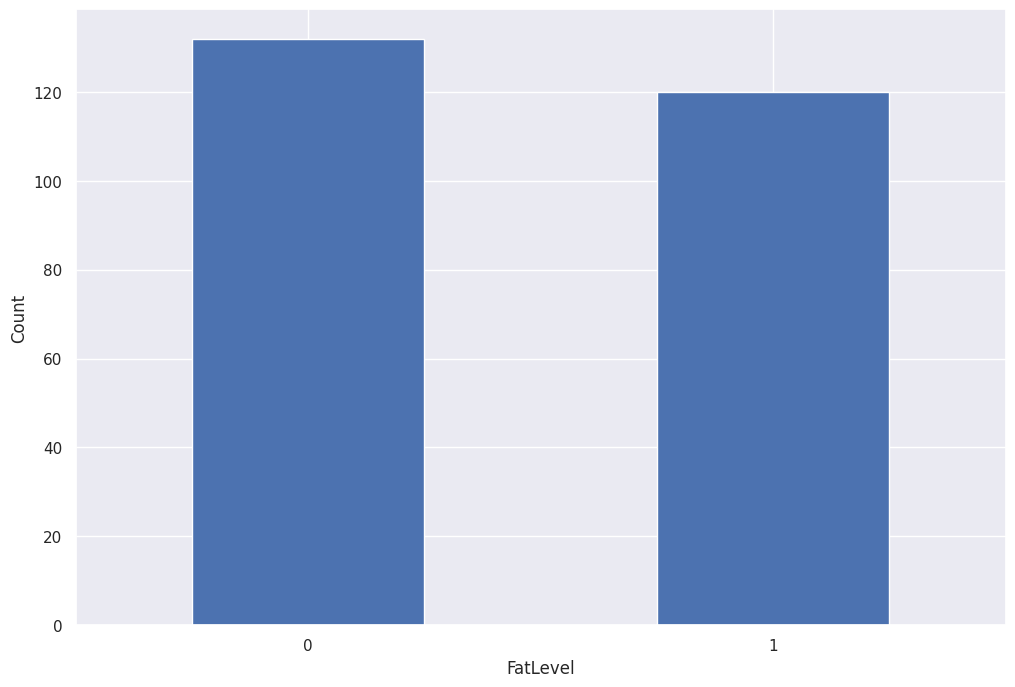

In [68]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('FatLevel')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

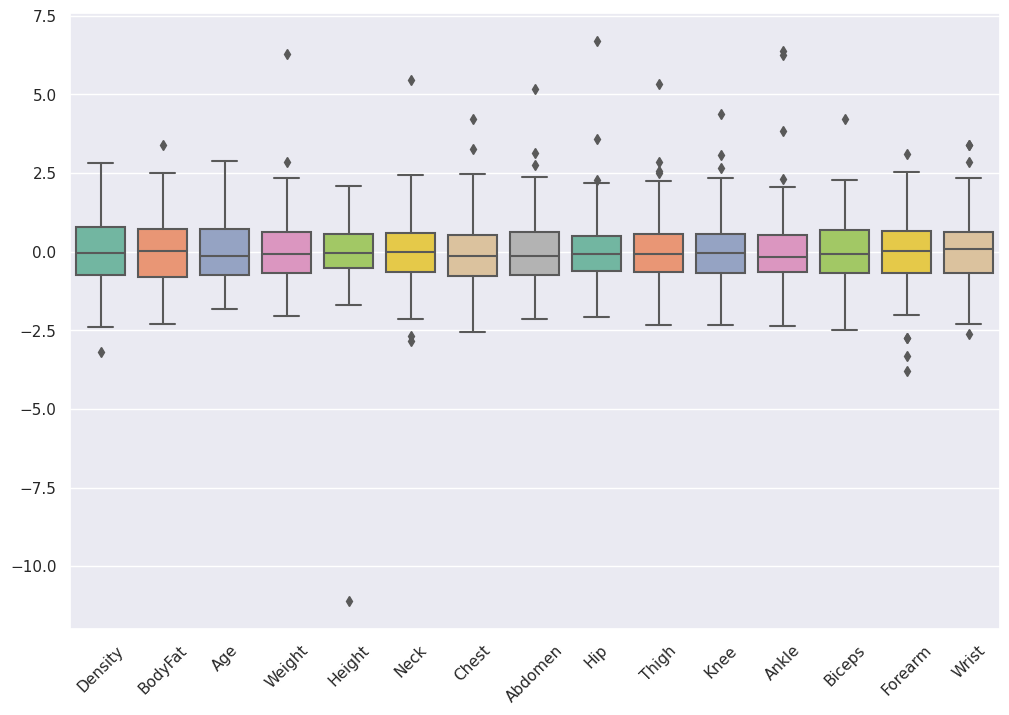

In [69]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


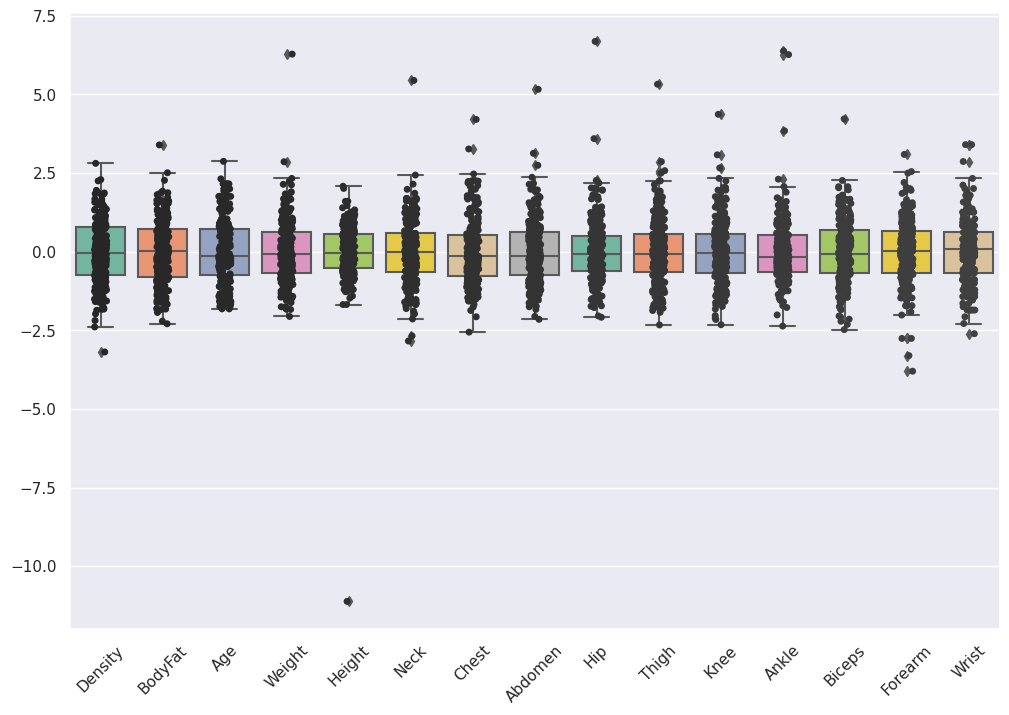

In [70]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [71]:
df.describe()

Density       BodyFat           Age        Weight        Height  \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean   5.688571e-15 -1.550788e-16  2.220446e-16  2.819614e-16  1.480297e-15   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -3.189163e+00 -2.292926e+00 -1.819583e+00 -2.060102e+00 -1.111966e+01   
25%   -7.462399e-01 -7.992934e-01 -7.263189e-01 -6.793000e-01 -5.194276e-01   
50%   -3.547554e-02  5.891481e-03 -1.498703e-01 -8.265733e-02 -4.070749e-02   
75%    7.805873e-01  7.362450e-01  7.247413e-01  6.162669e-01  5.747897e-01   
max    2.807582e+00  3.394253e+00  2.871515e+00  6.280963e+00  2.079339e+00   

               Neck         Chest       Abdomen           Hip         Thigh  \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean  -8.247371e-16 -5.639228e-17  3.313046e-16  8.379540e-16 -8.582200e-16   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -2.840817e+00 -2.558224e+00 -2.151708e+00 -2.084632e+00 -2.329591e+00   
25%   -6.562274e-01 -7.694810e-01 -7.416097e-01 -6.160653e-01 -6.500498e-01   
50%    3.271323e-03 -1.395583e-01 -1.492291e-01 -8.458411e-02 -7.747885e-02   
75%    5.906373e-01  5.408770e-01  6.289966e-01  5.063391e-01  5.618921e-01   
max    5.444135e+00  4.204531e+00  5.161290e+00  6.684808e+00  5.323774e+00   

               Knee         Ankle        Biceps       Forearm         Wrist  
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  
mean   8.758426e-16  7.542468e-16 -5.991680e-17 -3.002889e-15  3.348292e-16  
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  
min   -2.322577e+00 -2.366135e+00 -2.478519e+00 -3.800254e+00 -2.607794e+00  
25%   -6.711535e-01 -6.517075e-01 -6.876368e-01 -6.763048e-01 -6.759055e-01  
50%   -3.758855e-02 -1.787621e-01 -7.409368e-02  1.790624e-02  7.538454e-02  
75%    5.544311e-01  5.306560e-01  6.803985e-01  6.625308e-01  6.120203e-01  
max    4.366207e+00  6.383355e+00  4.220708e+00  3.092269e+00  3.402526e+00

### Pair Plot

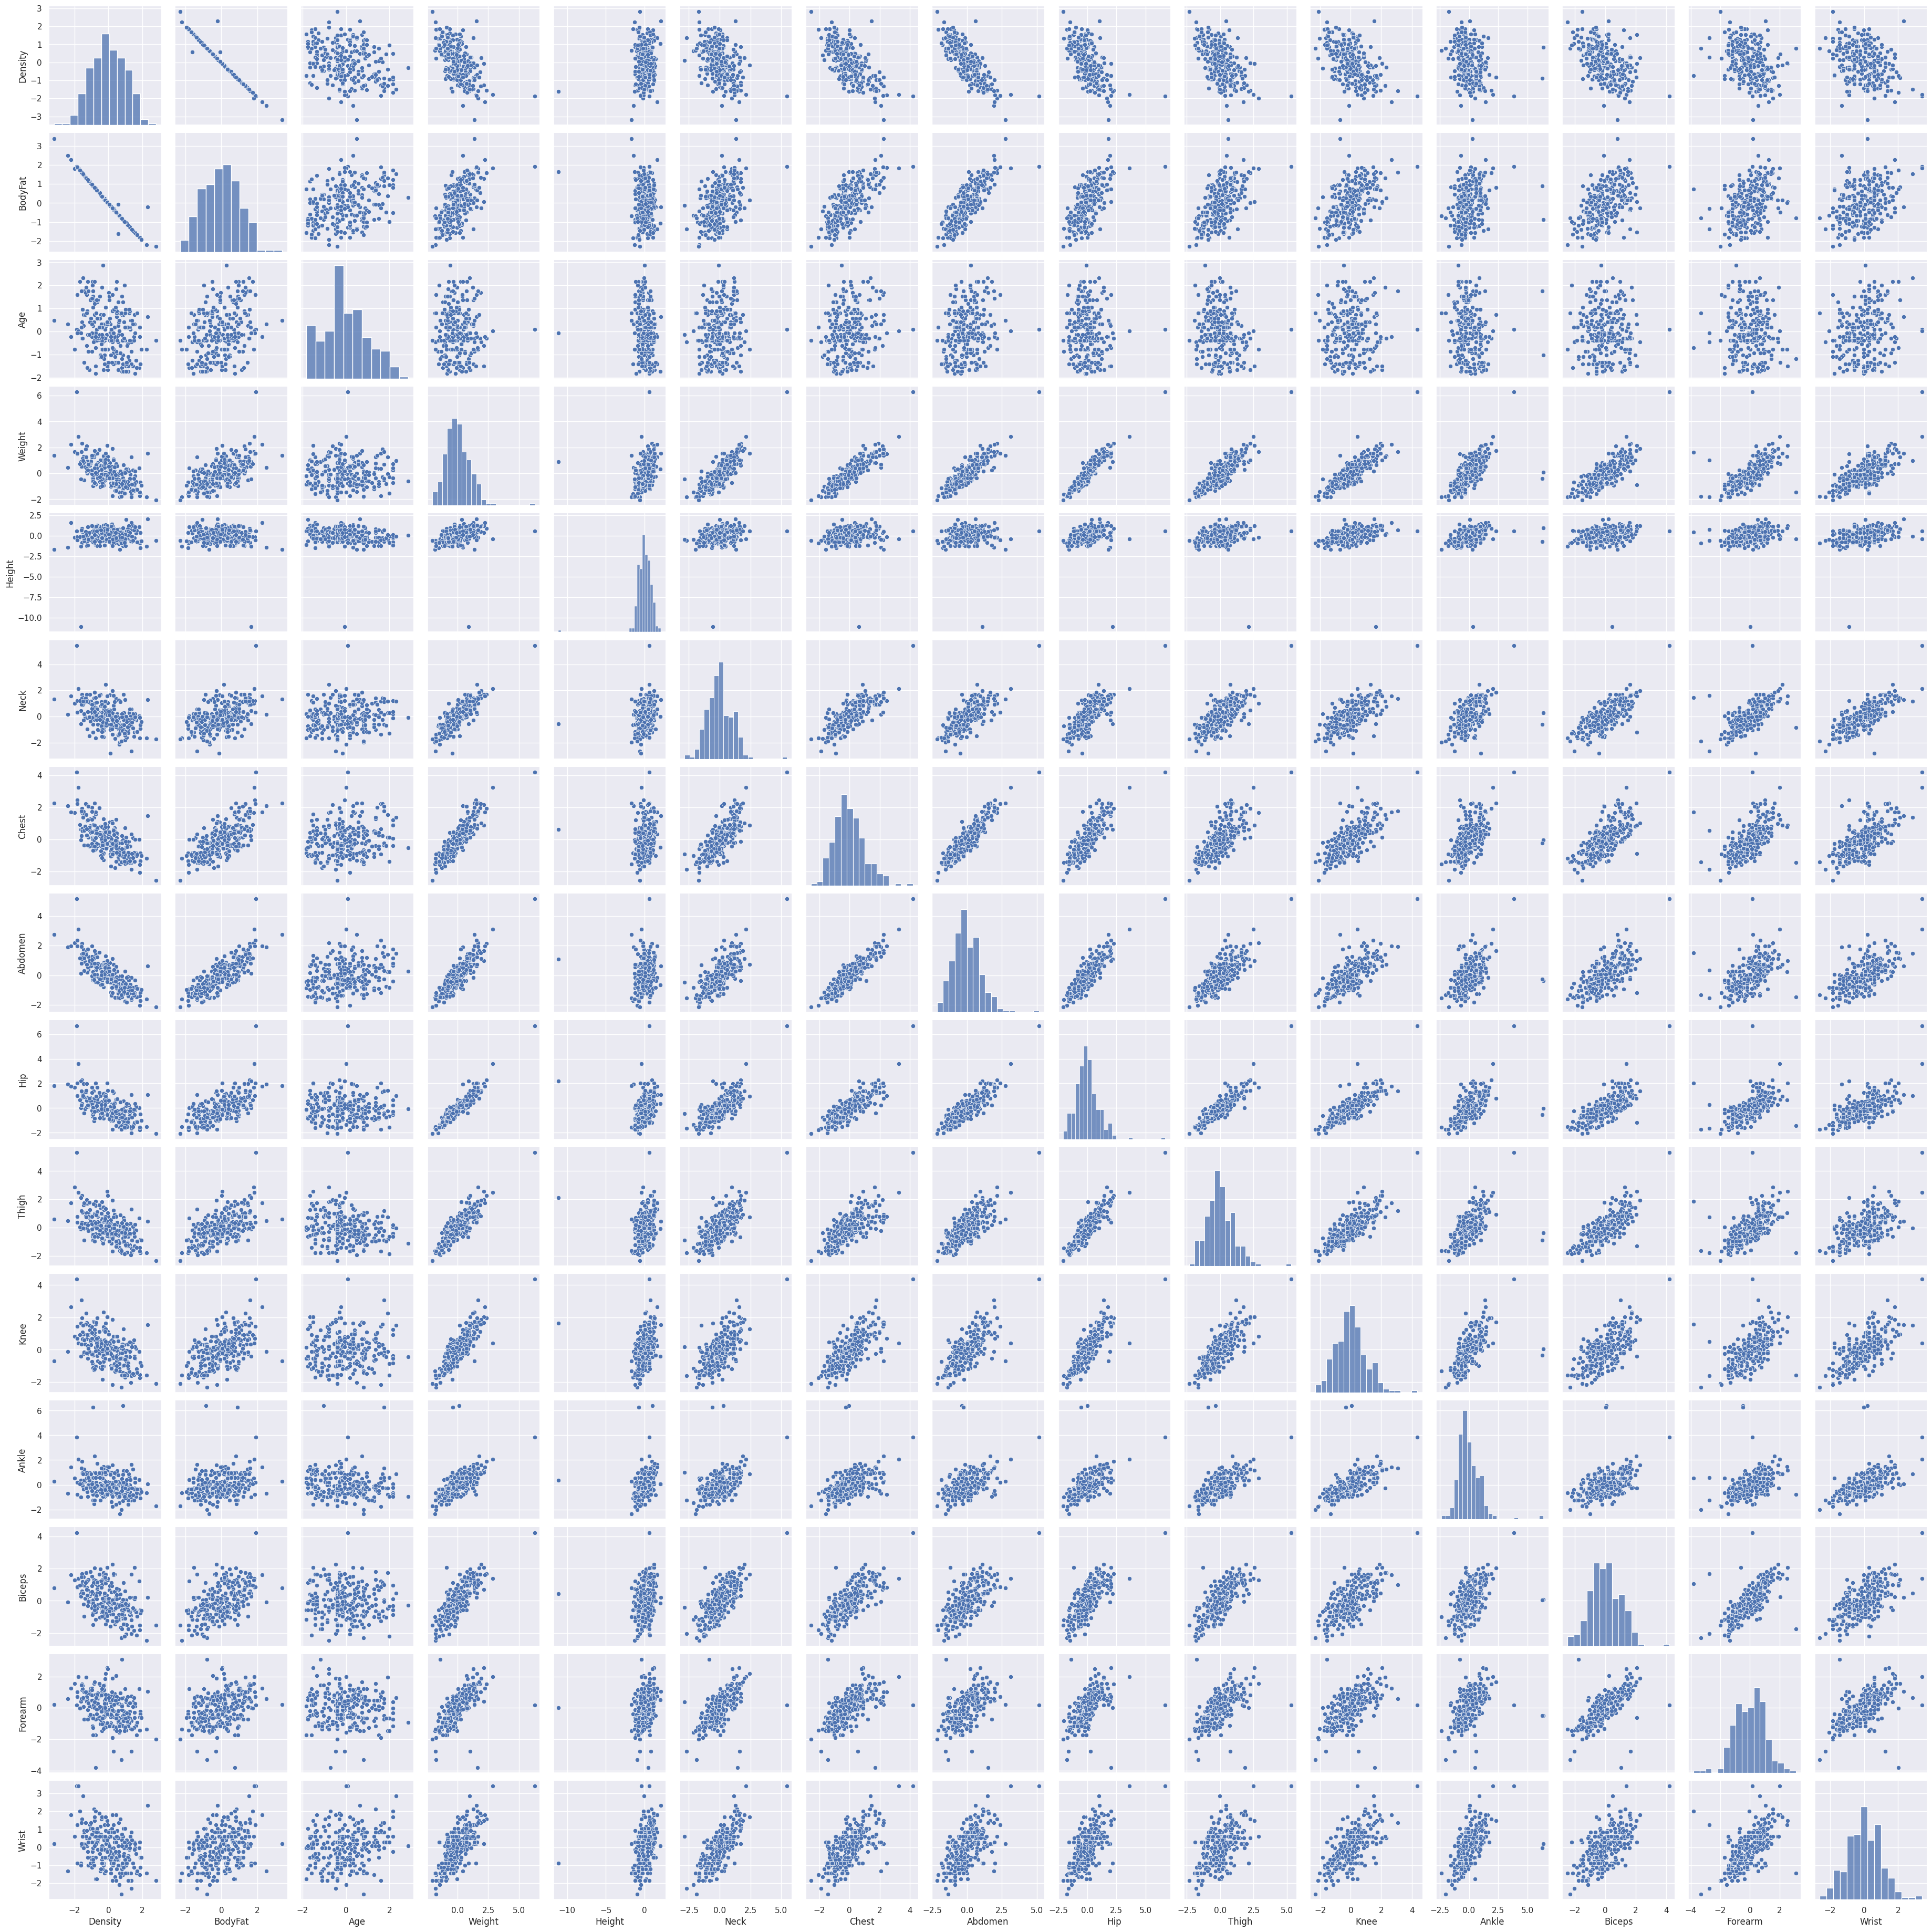

In [72]:
sns.pairplot(df)

## **Covariance**

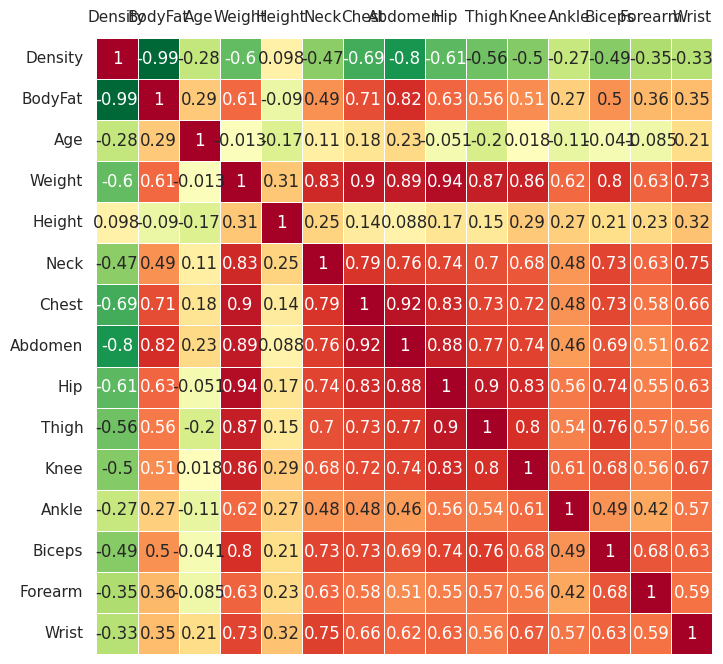

In [73]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

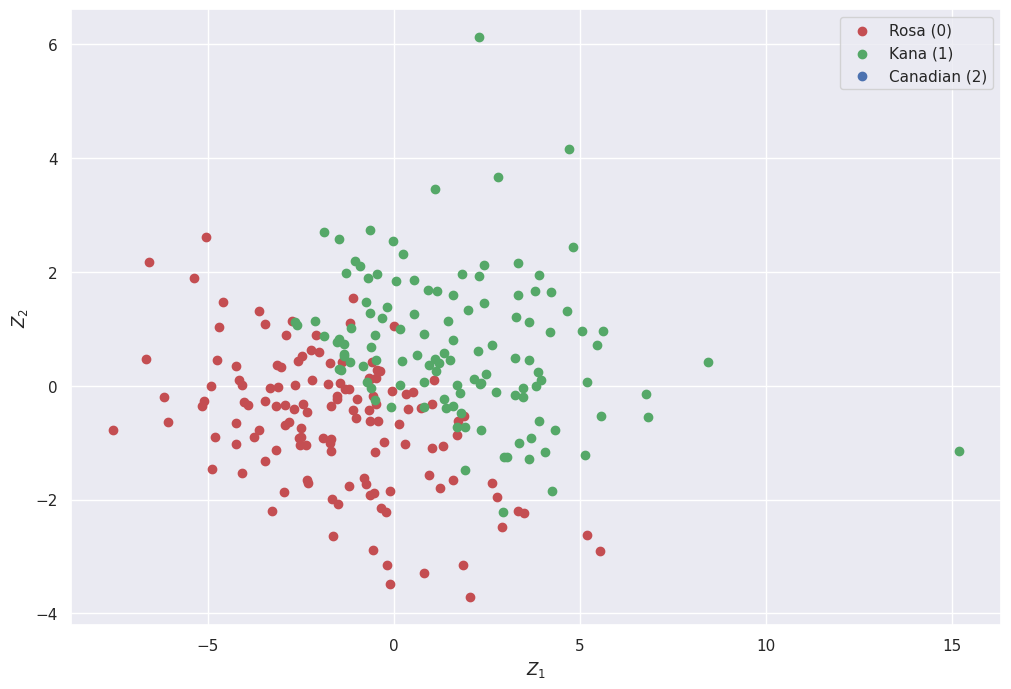

In [74]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

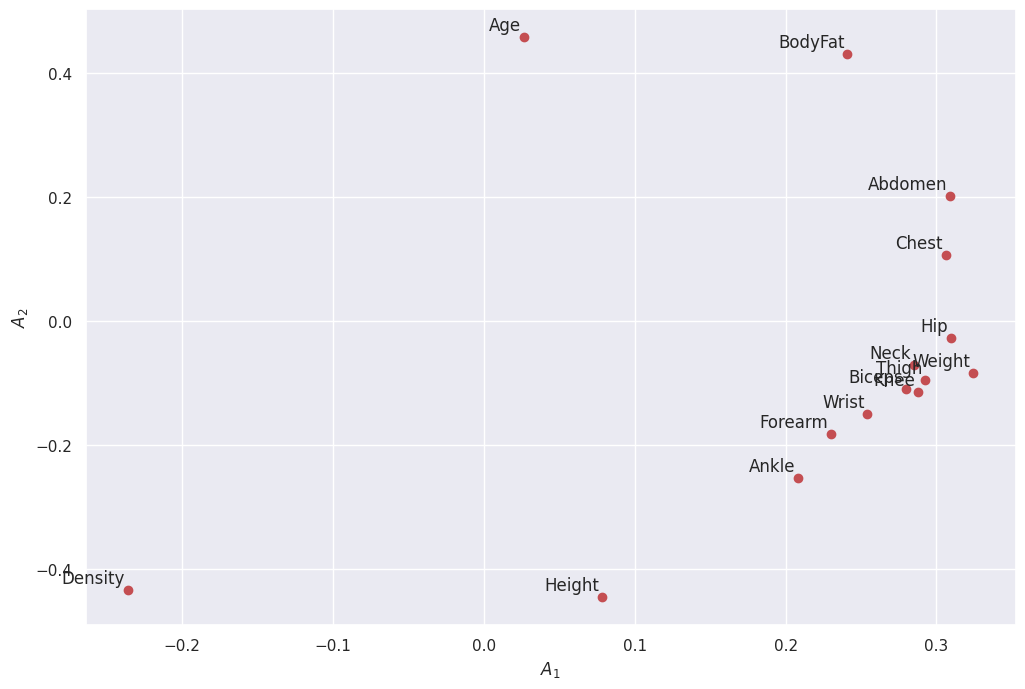

In [75]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


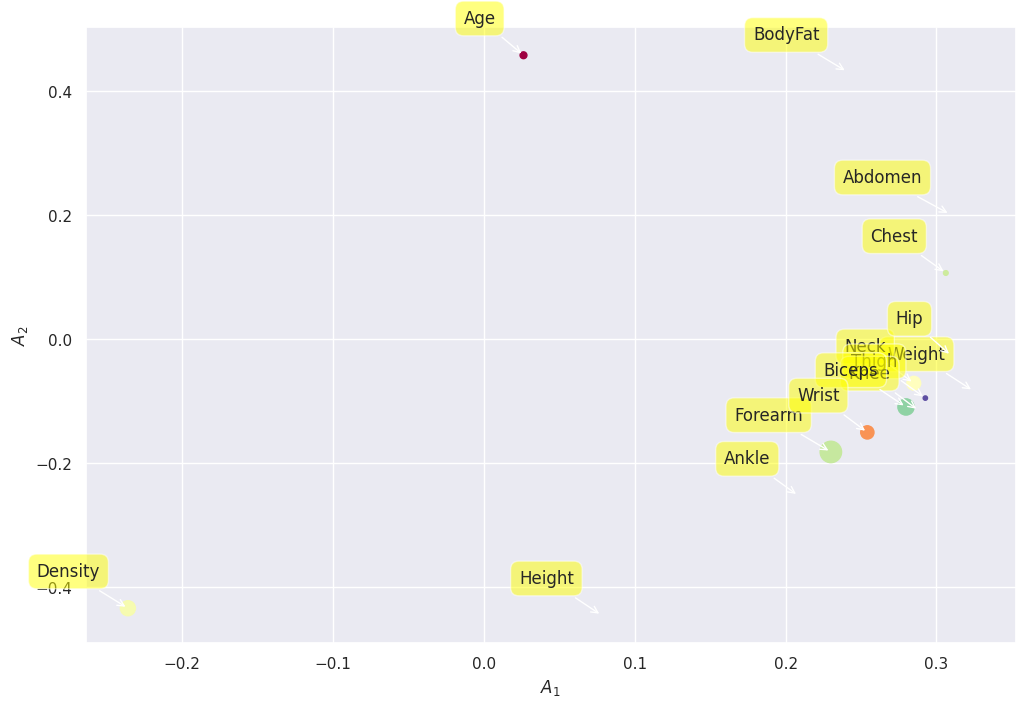

In [76]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

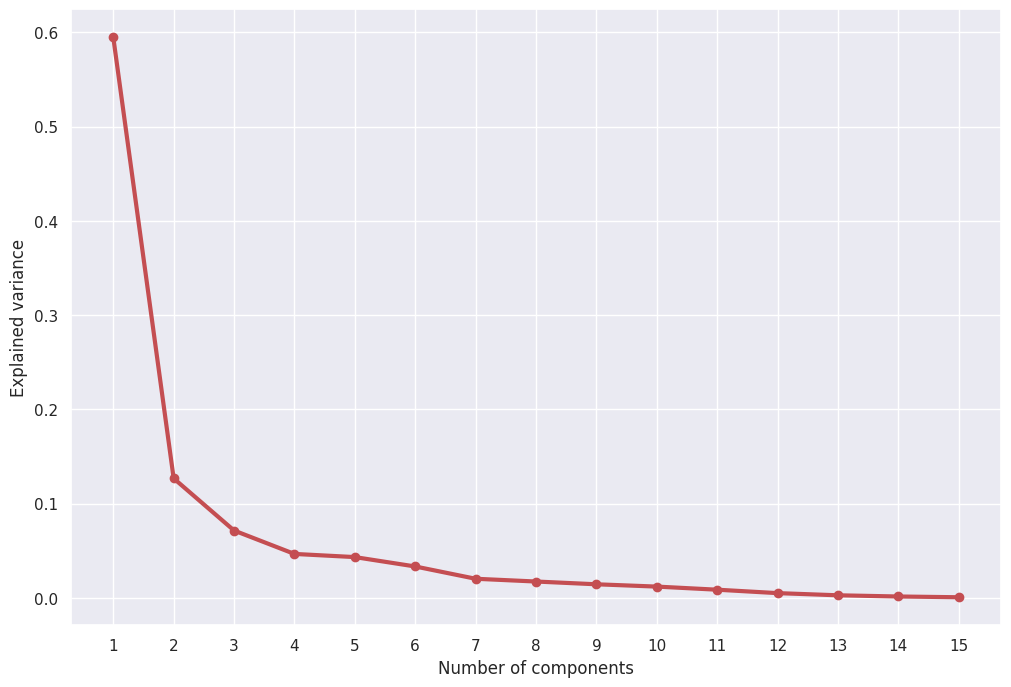

[8.95655497 1.91010279 1.0773234  0.70340397 0.65294106 0.50298491
 0.30673561 0.26263335 0.21848284 0.18165905 0.13203476 0.07729483
 0.04264557 0.02353619 0.01142766]


In [78]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
print (Lambda)


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

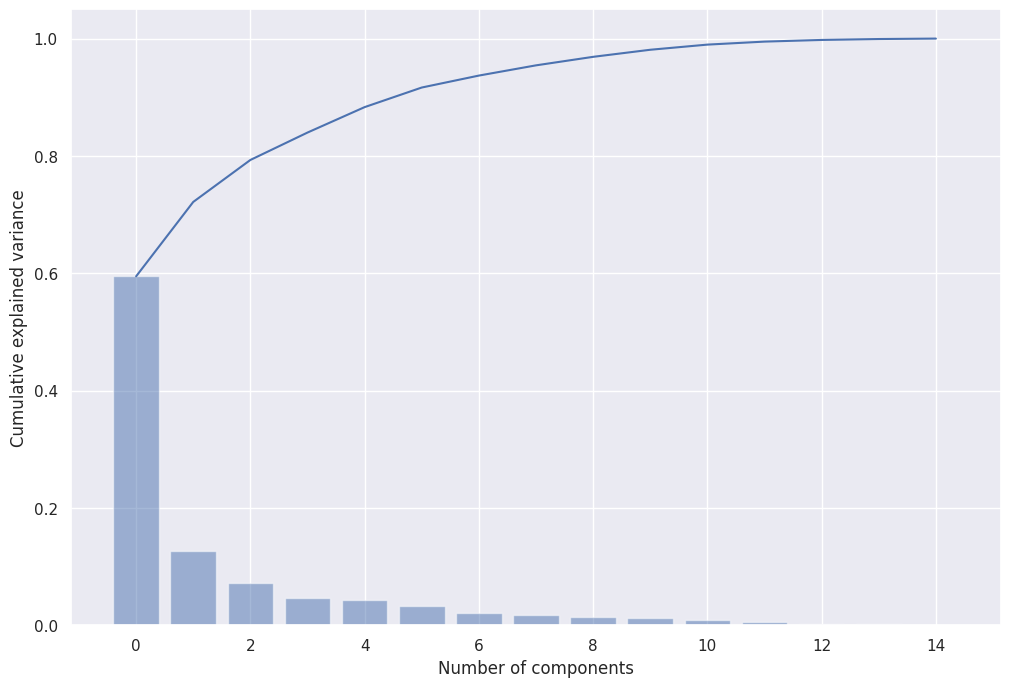

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [79]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (59.5%)',
 '1': 'PC 2 (12.7%)',
 '2': 'PC 3 (7.2%)',
 '3': 'PC 4 (4.7%)',
 '4': 'PC 5 (4.3%)',
 '5': 'PC 6 (3.3%)',
 '6': 'PC 7 (2.0%)',
 '7': 'PC 8 (1.7%)',
 '8': 'PC 9 (1.5%)',
 '9': 'PC 10 (1.2%)',
 '10': 'PC 11 (0.9%)',
 '11': 'PC 12 (0.5%)',
 '12': 'PC 13 (0.3%)',
 '13': 'PC 14 (0.2%)',
 '14': 'PC 15 (0.1%)'}

### **Biplot**

[[-0.23599615 -0.43357695 -0.15219583  0.23460926  0.13881608 -0.3150002
  -0.04343706 -0.03327616 -0.23291697  0.07395537  0.05241628 -0.01100887
  -0.07557983 -0.01784671  0.69857245]
 [ 0.24080464  0.43170806  0.13290542 -0.22960716 -0.14085377  0.28715621
   0.04112288  0.00163515  0.21295992 -0.0503167  -0.05373894  0.02660667
   0.14759356 -0.05092294  0.71092141]
 [ 0.02625391  0.45829009 -0.69674428  0.0485406   0.12918662 -0.05150779
  -0.28188442  0.18529598 -0.2307183  -0.10972622  0.30006499 -0.06343106
   0.08474228 -0.04063119 -0.01307885]
 [ 0.3244634  -0.08309402  0.02551741 -0.07016899  0.01510175 -0.17015389
   0.04478288 -0.06440893 -0.13943221  0.10268209  0.02839119  0.17320371
   0.11490528 -0.87713493 -0.05958348]
 [ 0.07802128 -0.44490906 -0.33065626 -0.68040674 -0.43081389  0.06798999
  -0.00959233  0.08049292 -0.04665304 -0.00146681  0.11558129 -0.05947101
   0.00340254  0.08824276  0.00380686]
 [ 0.2849755  -0.07071211 -0.19149835  0.19745382 -0.12234423 -0.2

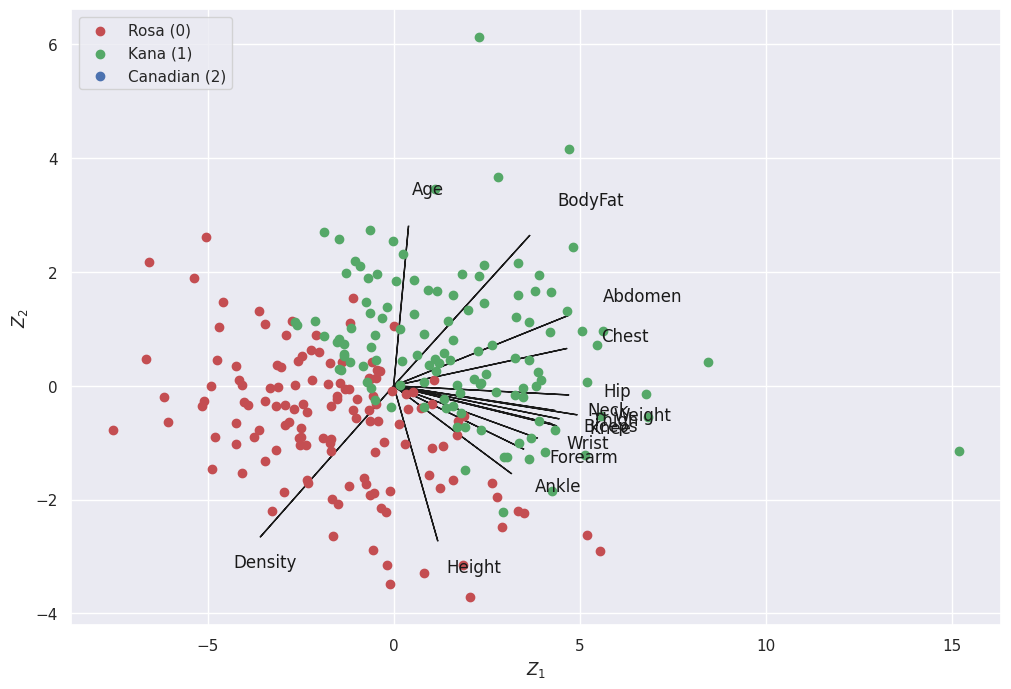

In [84]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
print(A)

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

     PC  feature   loading  type
0   PC1   Weight  0.324463  best
1   PC2      Age  0.458290  best
2   PC3      Age -0.696744  best
3   PC4   Height -0.680407  best
4   PC5    Ankle  0.682940  best
5   PC6    Ankle  0.539583  best
6   PC7     Knee -0.667890  best
7   PC8   Biceps  0.857827  best
8   PC2  Density -0.433577  weak
9   PC2  BodyFat  0.431708  weak
10  PC7     Neck  0.468783  weak
11  PC1    Chest  0.306219  weak
12  PC1  Abdomen  0.309008  weak
13  PC1      Hip  0.309735  weak
14  PC3    Thigh  0.314772  weak
15  PC6  Forearm  0.526294  weak
16  PC3    Wrist -0.435955  weak


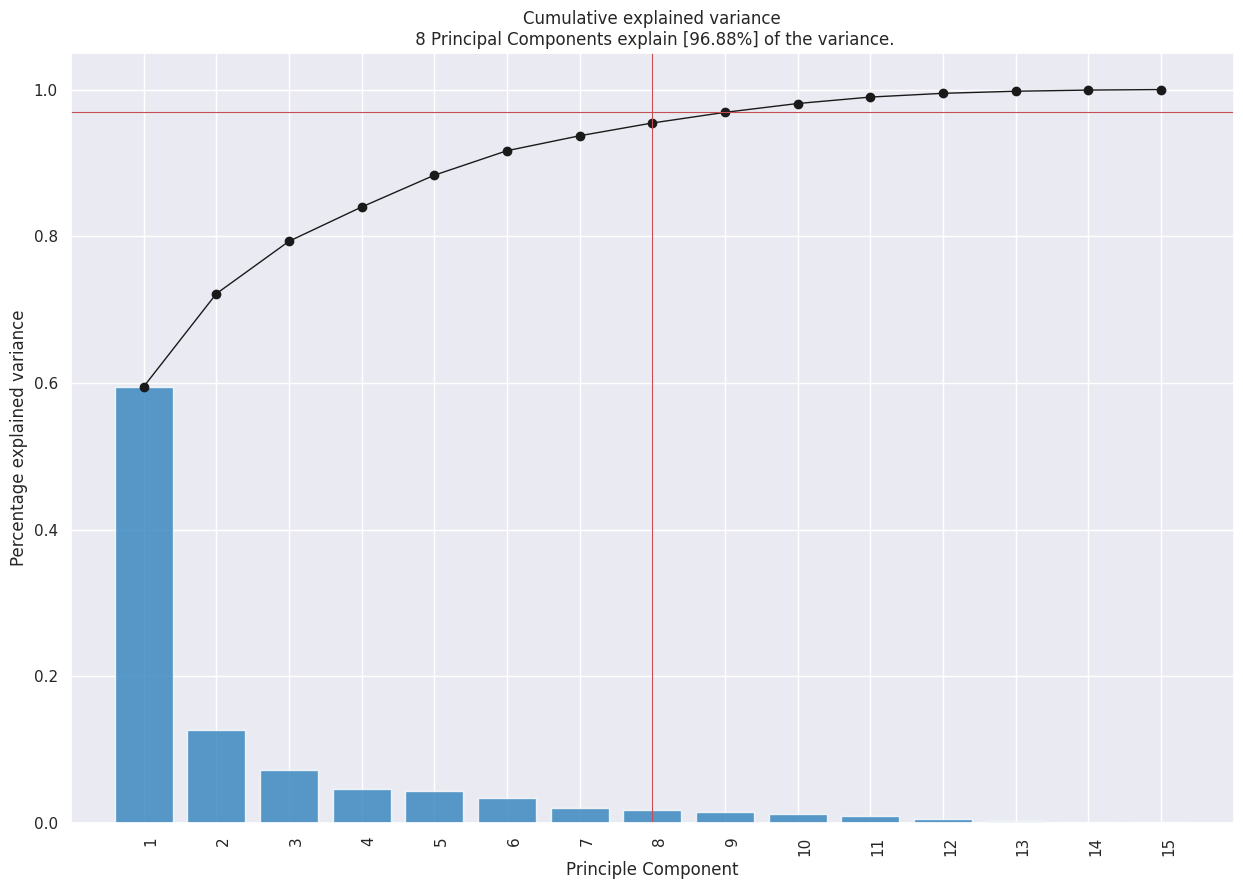

In [ ]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


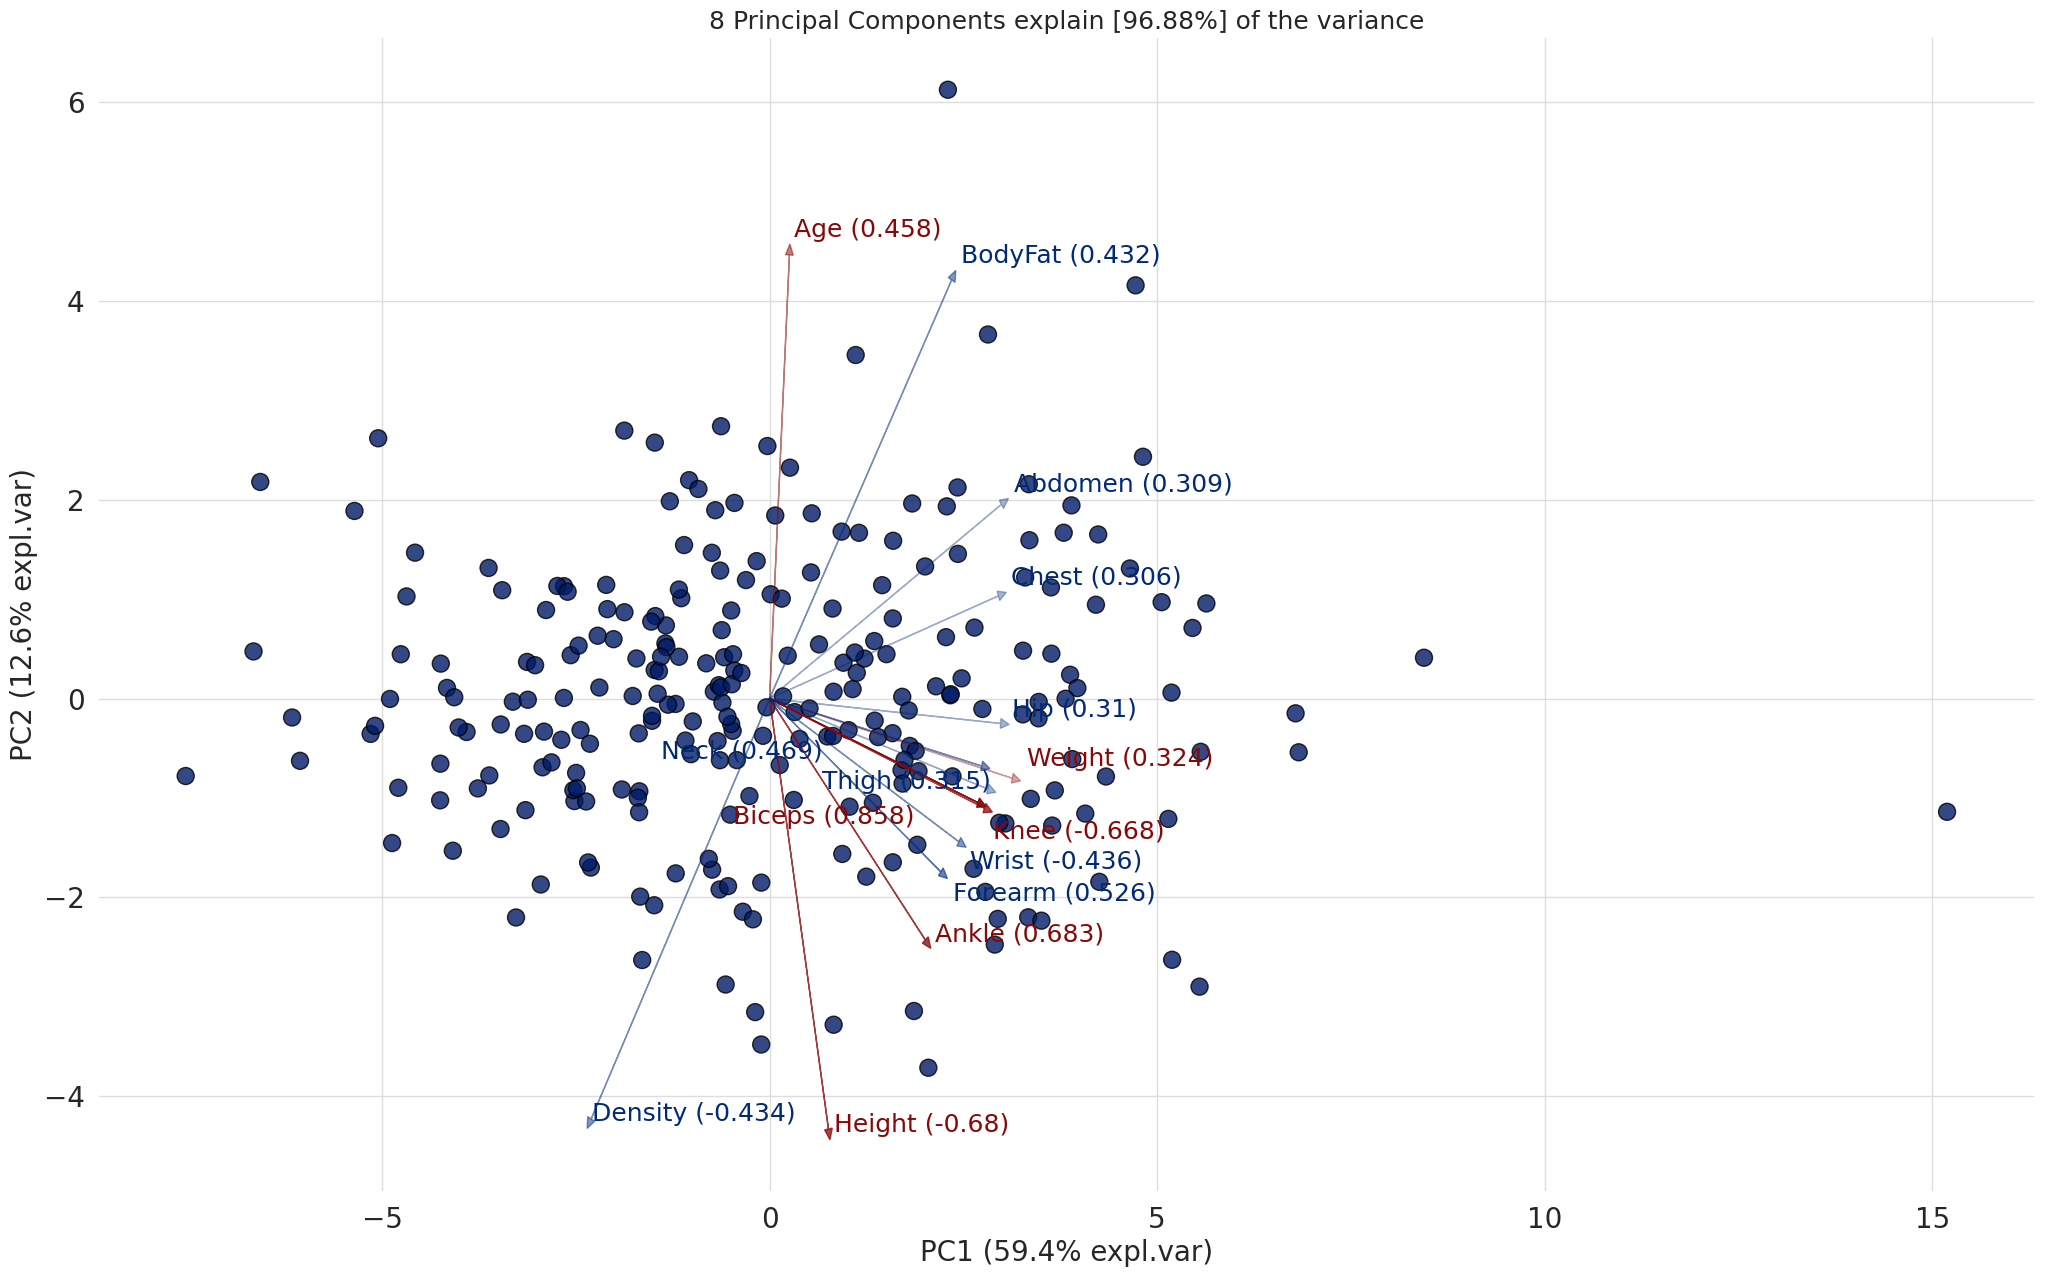

In [ ]:
 ax = model.biplot(label=False, legend=False)

In [ ]:
model.biplot(legend=False, hotellingt2=True)

TypeError: ignored

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '8 Principal Components explain [96.88%] of the variance'}, xlabel='PC1 (59.4% expl.var)', ylabel='PC2 (12.6% expl.var)'>)

In [ ]:
ax = model.biplot3d(legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


### **Principal components**

In [57]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

PC1:[-0.23599615  0.24080464  0.02625391  0.3244634   0.07802128  0.2849755
  0.30621895  0.3090083   0.30973501  0.29263213  0.28806012  0.20840594
  0.27983104  0.23000107  0.25418837]
PC2:[-0.43357695  0.43170806  0.45829009 -0.08309402 -0.44490906 -0.07071211
  0.10712485  0.20180458 -0.02608533 -0.09465186 -0.11453138 -0.25194412
 -0.1089832  -0.18153586 -0.1499812 ]


### **Hotelling's T2 test**

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  4]
 [ 30]
 [ 35]
 [ 38]
 [ 40]
 [ 41]
 [ 47]
 [ 53]
 [ 58]
 [ 85]
 [ 95]
 [105]
 [158]
 [174]
 [181]
 [205]
 [215]]


### **Control Charts for Principal Components**

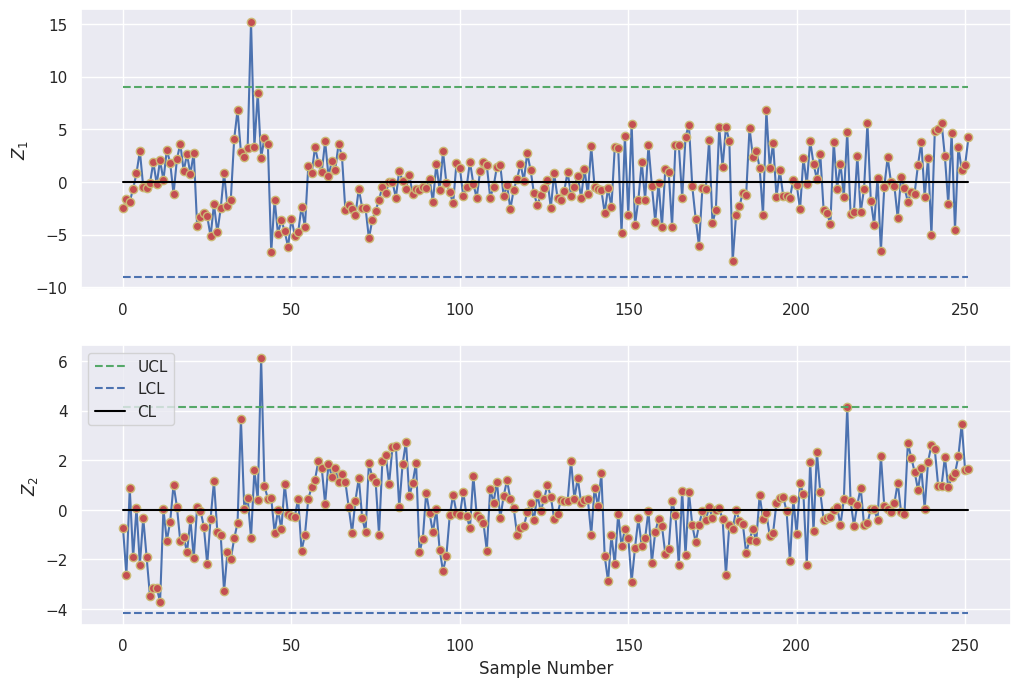

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[38]]
[]
[[ 41]
 [215]]


## **Multi-Class Classification**

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 176
Test Dataset Size: 76


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        40
           1      1.000     1.000     1.000        36

    accuracy                          1.000        76
   macro avg      1.000     1.000     1.000        76
weighted avg      1.000     1.000     1.000        76



DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.912     0.775     0.838        40
           1      0.786     0.917     0.846        36

    accuracy                          0.842        76
   macro avg      0.849     0.846     0.842        76
weighted avg      0.852     0.842     0.842        76



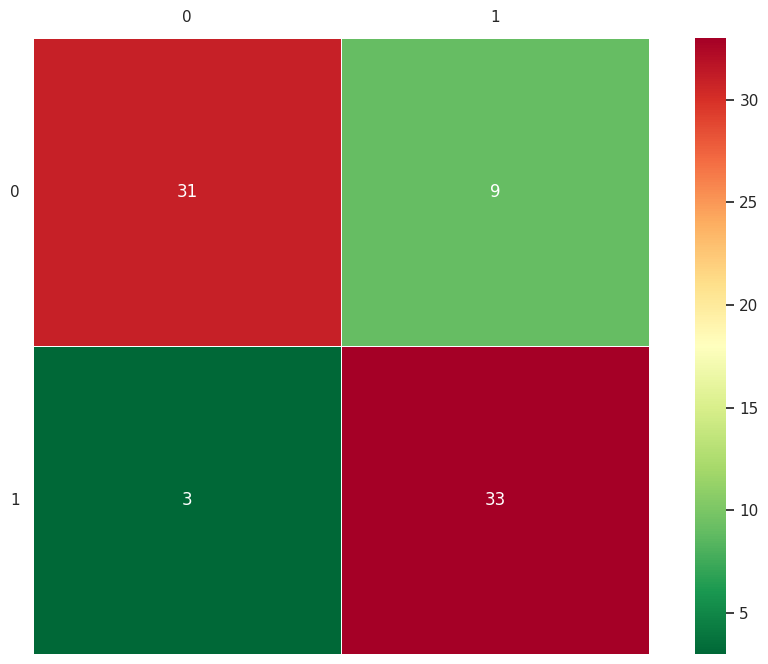

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.833     1.000     0.909        40
           1      1.000     0.778     0.875        36

    accuracy                          0.895        76
   macro avg      0.917     0.889     0.892        76
weighted avg      0.912     0.895     0.893        76



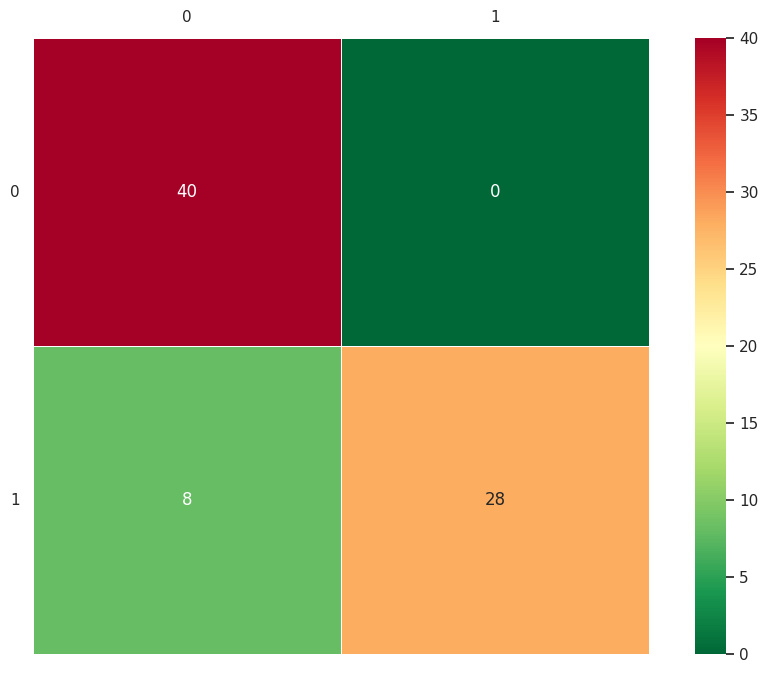

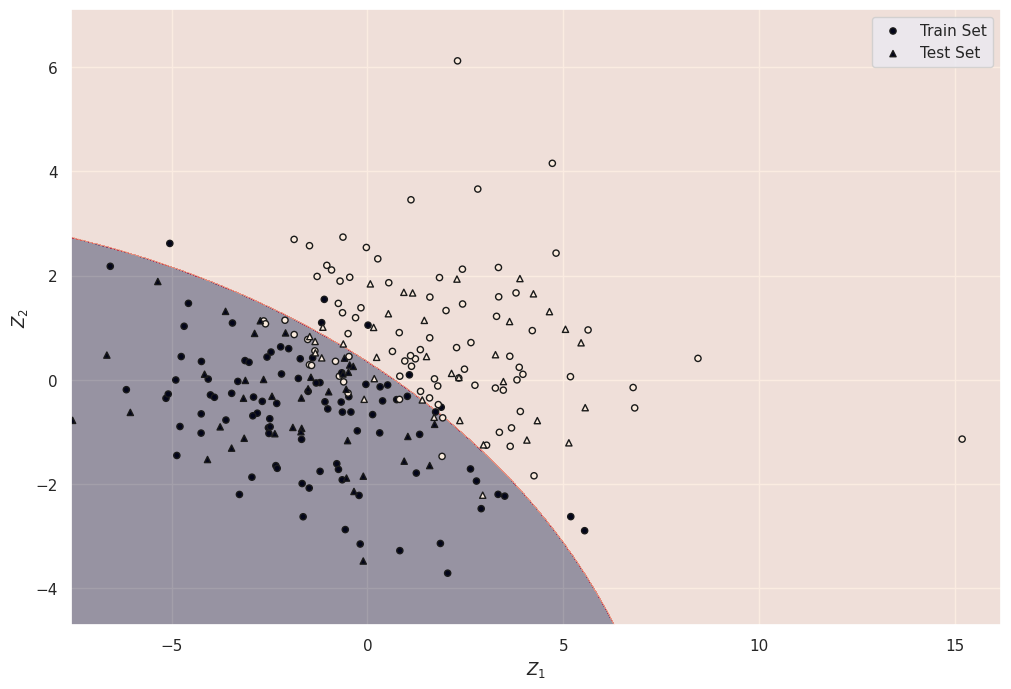

(array([ 3,  6, 12, 23, 28, 37, 41, 52]),)


In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 4}
k_Z: {'n_neighbors': 4}
k_Z12: {'n_neighbors': 4}
                                    0         1         2         3         4
knn_full_data fit_time       0.002340  0.002552  0.002674  0.002734  0.002495
knn_Z  fit_time              0.001440  0.001179  0.001175  0.001091  0.001019
knn_Z12 fit_time             0.000971  0.000914  0.001610  0.000924  0.000973
knn_full_data test_f1_macro  0.745083  0.800000  0.799345  0.769737  0.828431
knn_Z  test_f1_macro         0.858379  0.799345  0.852817  0.913151  0.885621
knn_Z12 test_f1_macro        0.801731  0.914005  0.856675  0.855252  0.885621

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.867     0.975     0.918        40
           1      0.968     0.833     0.896        36

    accuracy                          0.908        76
   macro avg      0.917     0.904     0.907        76
weighted avg      0.915     0.908   

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.889     1.000     0.941        40
           1      1.000     0.861     0.925        36

    accuracy                          0.934        76
   macro avg      0.944     0.931     0.933        76
weighted avg      0.942     0.934     0.934        76



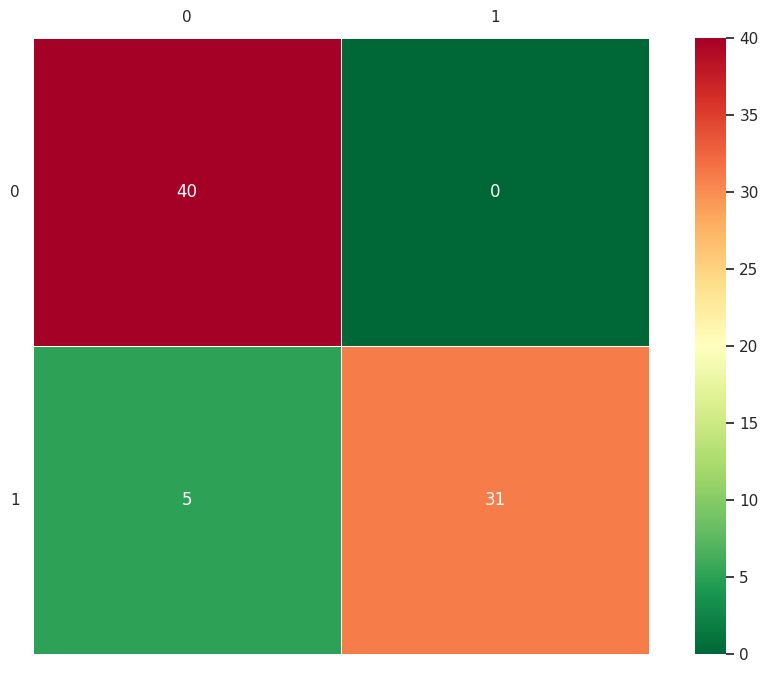

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.791     0.850     0.819        40
           1      0.818     0.750     0.783        36

    accuracy                          0.803        76
   macro avg      0.804     0.800     0.801        76
weighted avg      0.804     0.803     0.802        76



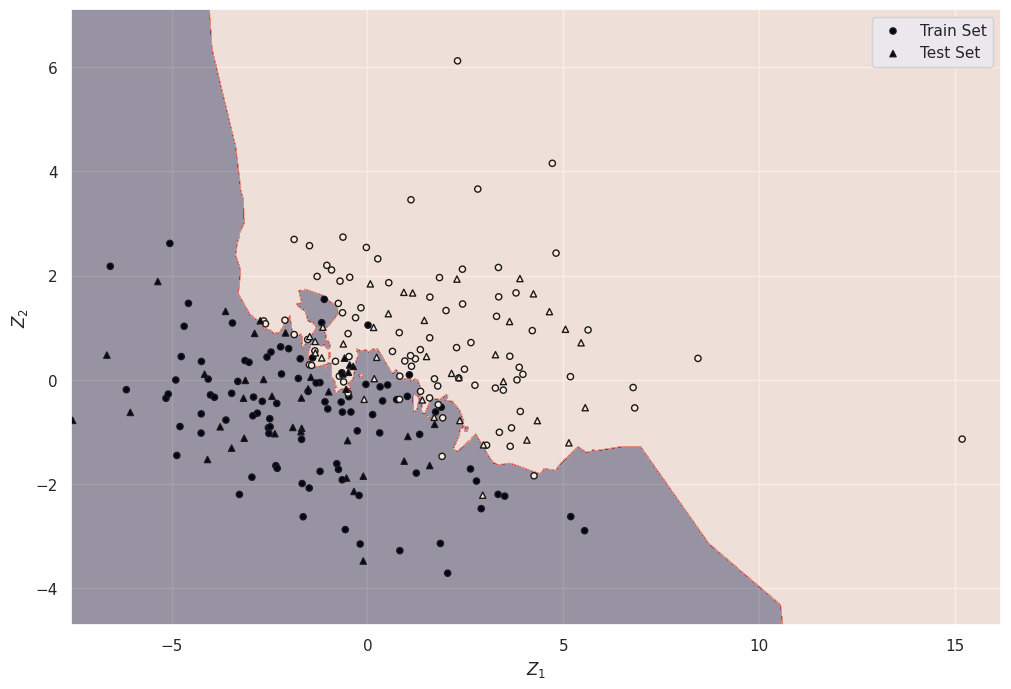

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.004022  0.003471  0.004055  0.003471  0.006280
dt_Z  fit_time              0.002498  0.001853  0.002231  0.002308  0.002364
dt_Z12 fit_time             0.001462  0.001337  0.001378  0.001329  0.001349
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.766234  0.728682  0.797353  0.885621  0.769737
dt_Z12 test_f1_macro        0.828571  0.883333  0.828431  0.856675  0.857143

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        40
           1      1.000     1.000     1.000        36

    accuracy                          1.000        76
   macro avg      1.000     1.000     1.000        76
weighted avg      1.000     1.000    

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.744     0.800     0.771        40
           1      0.758     0.694     0.725        36

    accuracy                          0.750        76
   macro avg      0.751     0.747     0.748        76
weighted avg      0.751     0.750     0.749        76



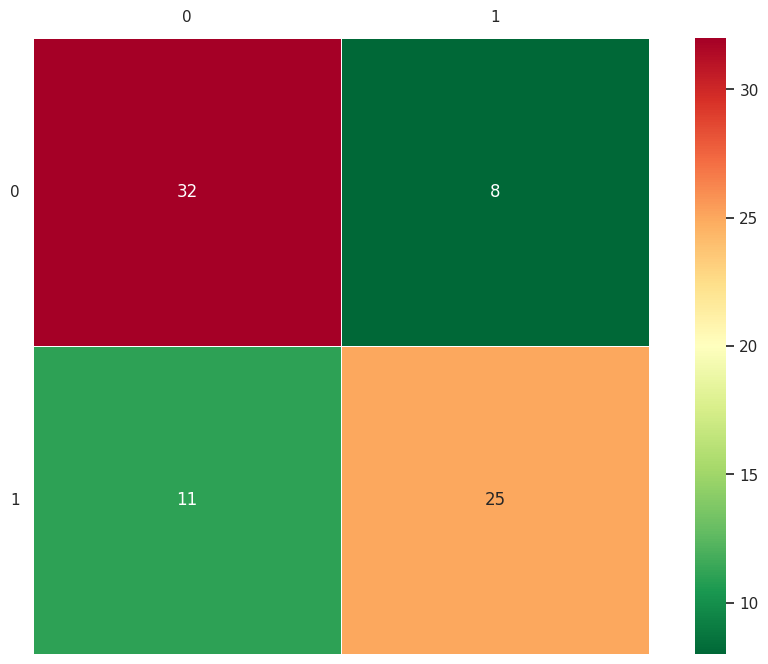

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.846     0.825     0.835        40
           1      0.811     0.833     0.822        36

    accuracy                          0.829        76
   macro avg      0.828     0.829     0.829        76
weighted avg      0.829     0.829     0.829        76



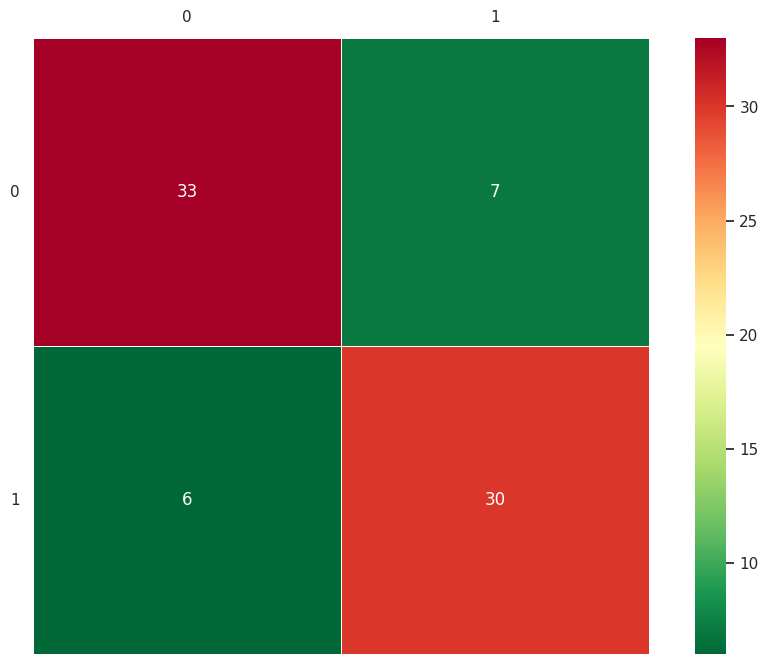

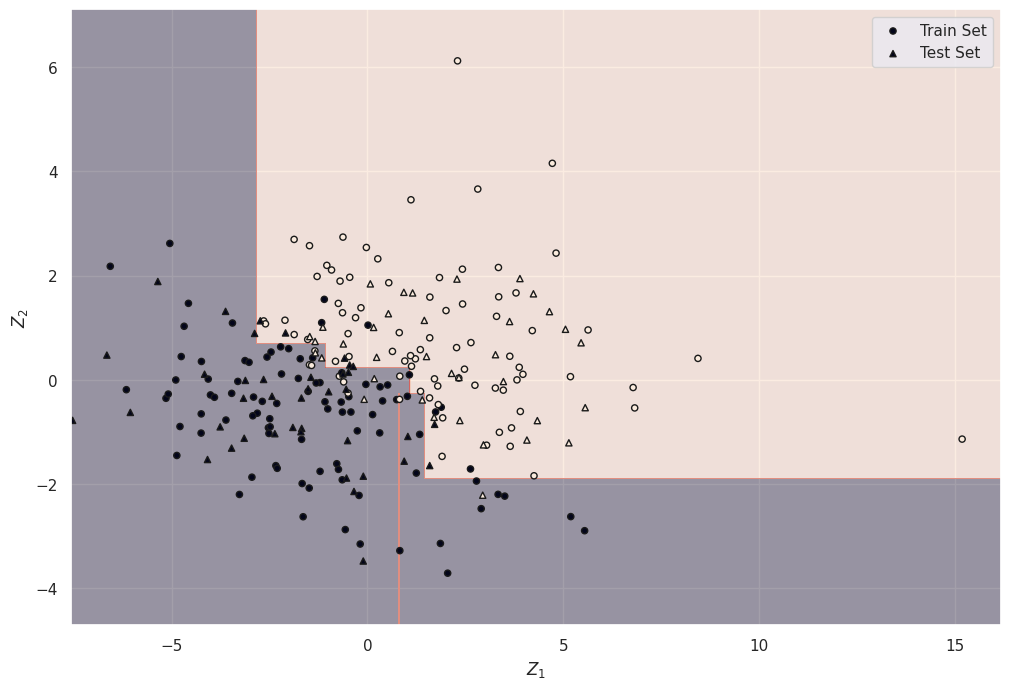

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


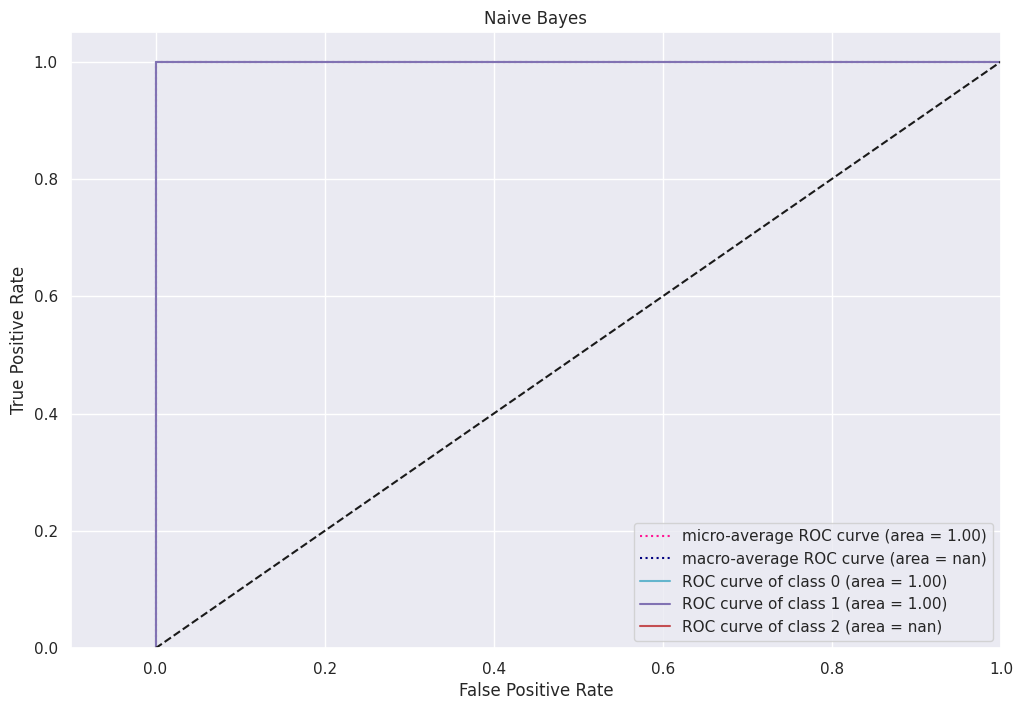

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


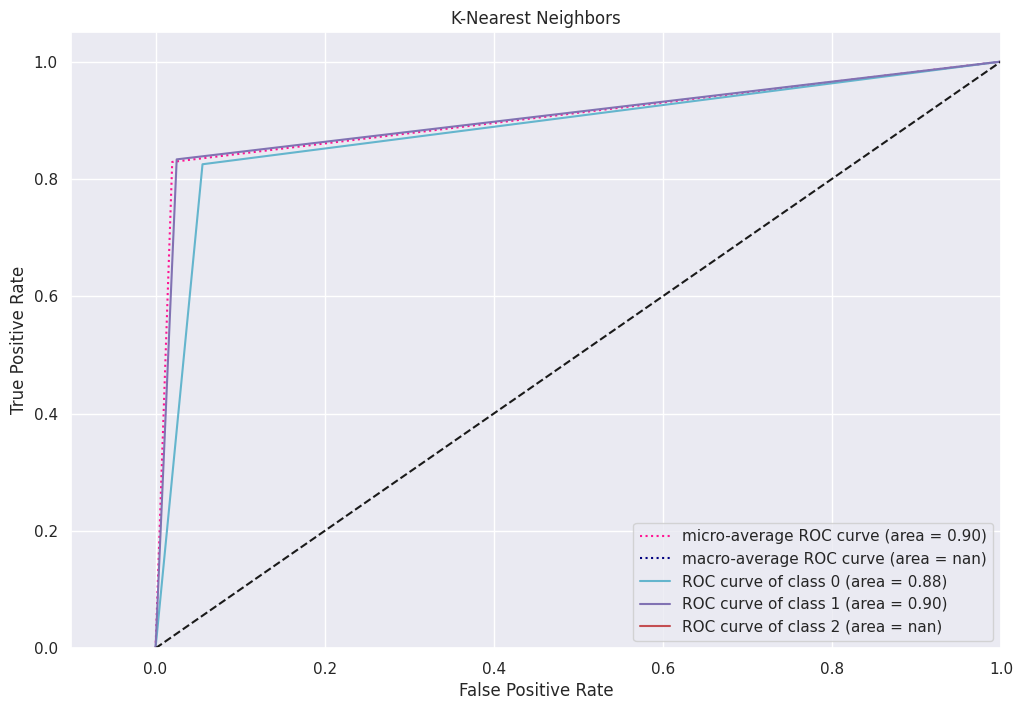

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


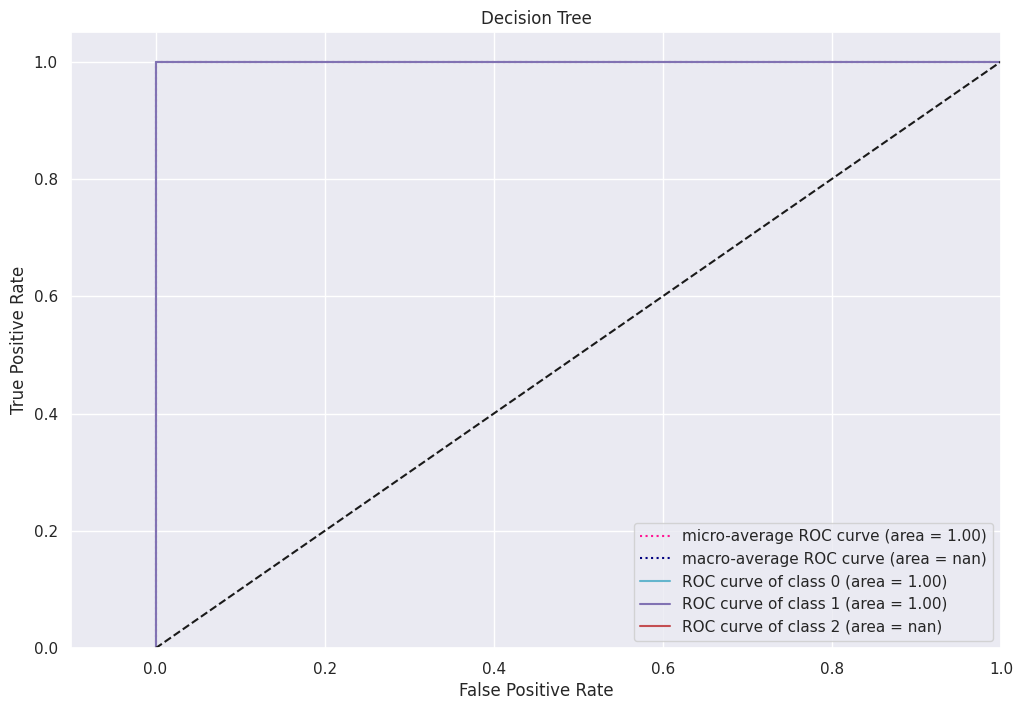

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


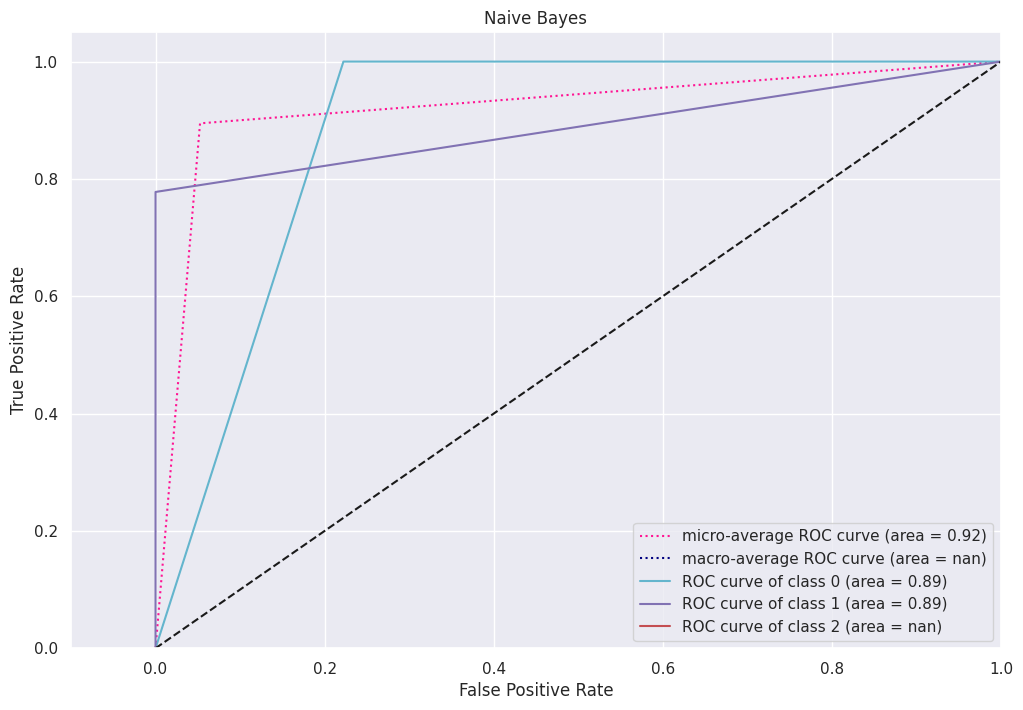

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


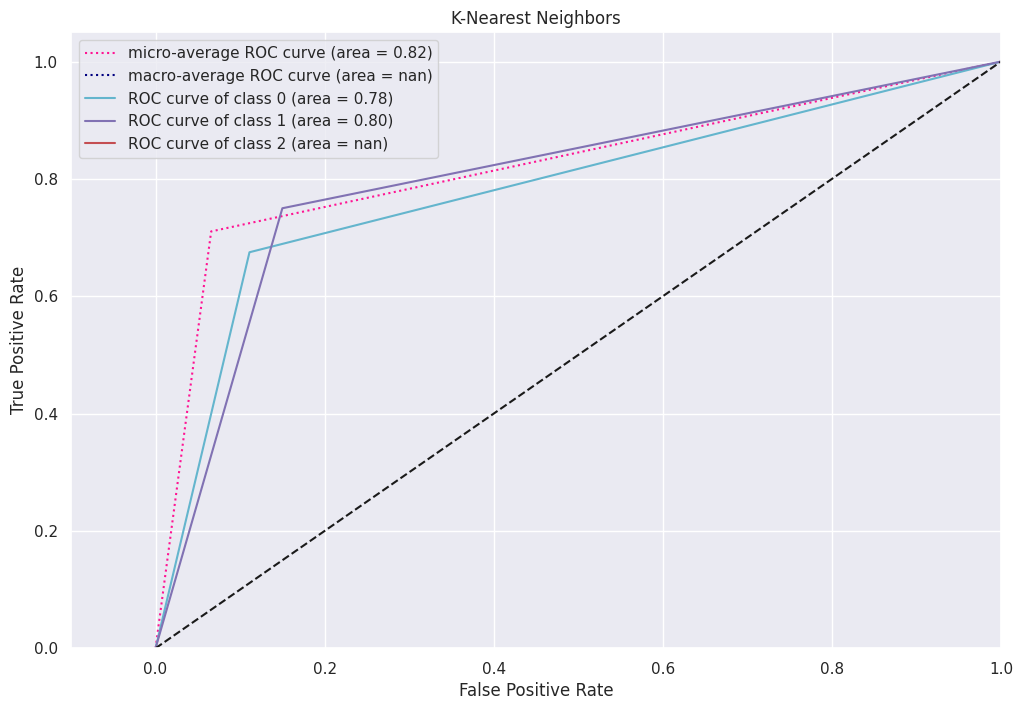

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [92]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

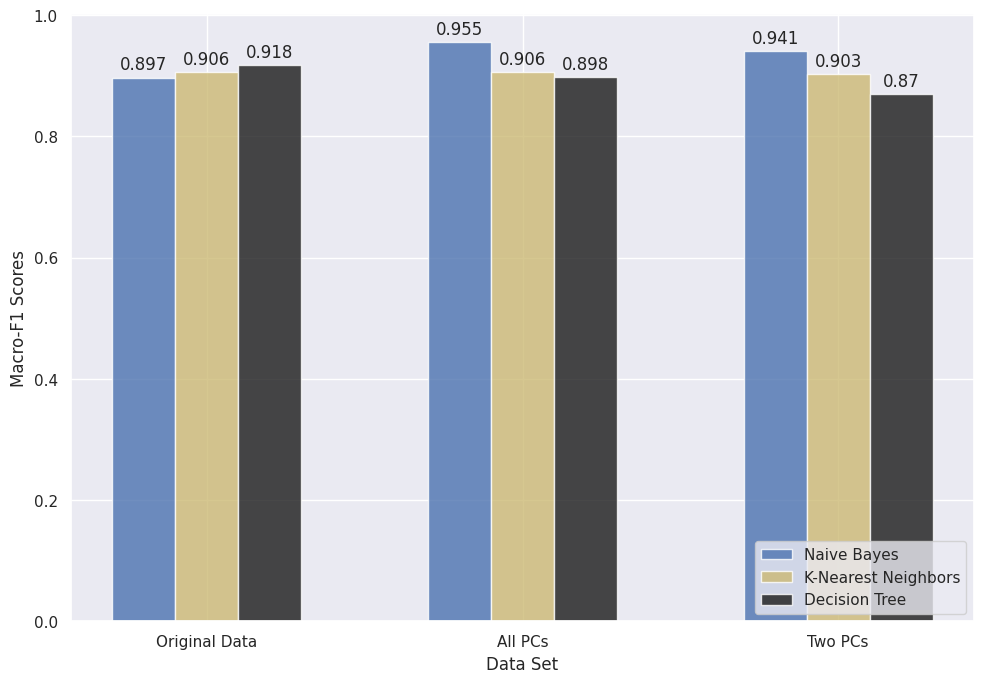

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()